In [ ]:
# Load EDA Pkgs
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Load FB Prophet
import fbprophet

In [ ]:
dir(fbprophet)

In [ ]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ikan.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head()

,month,production
0,2010-01,276601
1,2010-02,141770
2,2010-03,182076
3,2010-04,234364
4,2010-05,335726


In [ ]:
df.describe()

,production
count,132.000000
mean,207312.575758
std,69093.252706
min,54481.000000
25%,166261.250000
50%,200988.500000
75%,247550.500000
max,391493.000000


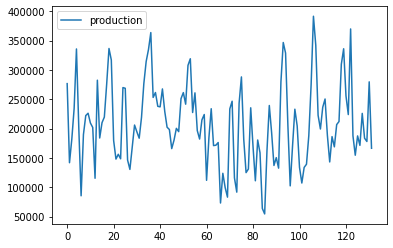

In [ ]:
df.plot()

In [ ]:
# stationary
# yt = yt -y(t-1)
df['production'] = df['production'] - df['production'].shift(1)

In [ ]:
df.plot()

In [ ]:
from fbprophet import Prophet

In [ ]:
# Features of Prophet
dir(Prophet)

In [ ]:
# Initialize the Model
model = Prophet()

#### Parameters
+ growth: linear/logistic
+ seasonality: additive/multiplicative
+ holidays
+ changepoint

In [ ]:
df.columns

Index(['month', 'production'], dtype='object')

In [ ]:
# Works with a ds and y column names
df.rename(columns={'month':'ds','production':'y'},inplace=True)

In [ ]:
df.head()

,ds,y
0,2010-01,276601
1,2010-02,141770
2,2010-03,182076
3,2010-04,234364
4,2010-05,335726


In [ ]:
df = df[1:]

In [ ]:
df.head()

In [ ]:
# Fit Model to Data
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Shape of Dataset
df.shape

(132, 2)

In [ ]:
# Create Future Dates of 365 days
future_dates = model.make_future_dataframe(periods=365)

In [ ]:
# Shape after adding 365 days
future_dates.shape

(497, 1)

In [ ]:
future_dates.head()

,ds
0,2010-01-01
1,2010-02-01
2,2010-03-01
3,2010-04-01
4,2010-05-01


In [ ]:
# Make Prediction with Model
prediction = model.predict(future_dates)

In [ ]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,217436.665845,112331.248899,283540.634775,217436.665845,217436.665845,-18090.817506,-18090.817506,-18090.817506,-18090.817506,-18090.817506,-18090.817506,0.0,0.0,0.0,199345.848339
1,2010-02-01,217284.715016,119877.657683,282028.695092,217284.715016,217284.715016,-16108.916894,-16108.916894,-16108.916894,-16108.916894,-16108.916894,-16108.916894,0.0,0.0,0.0,201175.798122
2,2010-03-01,217147.469106,150730.091385,318263.782305,217147.469106,217147.469106,20091.425643,20091.425643,20091.425643,20091.425643,20091.425643,20091.425643,0.0,0.0,0.0,237238.894749
3,2010-04-01,216995.518278,144772.310438,307371.535195,216995.518278,216995.518278,9315.080966,9315.080966,9315.080966,9315.080966,9315.080966,9315.080966,0.0,0.0,0.0,226310.599243
4,2010-05-01,216848.469089,131948.907131,297011.289108,216848.469089,216848.469089,174.267221,174.267221,174.267221,174.267221,174.267221,174.267221,0.0,0.0,0.0,217022.736309


In [ ]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
492,2021-11-27,197034.170835,140604.101025,311636.015987,197023.641395,197046.031490,27234.840923,27234.840923,27234.840923,27234.840923,27234.840923,27234.840923,0.0,0.0,0.0,224269.011758
493,2021-11-28,197029.847864,136474.011530,304451.126278,197019.289153,197041.798679,26892.358915,26892.358915,26892.358915,26892.358915,26892.358915,26892.358915,0.0,0.0,0.0,223922.206779
494,2021-11-29,197025.524894,132216.867662,311844.828077,197014.937961,197037.516862,26587.572385,26587.572385,26587.572385,26587.572385,26587.572385,26587.572385,0.0,0.0,0.0,223613.097278
495,2021-11-30,197021.201923,144633.523581,309469.610165,197010.550640,197033.233059,26296.780566,26296.780566,26296.780566,26296.780566,26296.780566,26296.780566,0.0,0.0,0.0,223317.982489
496,2021-12-01,197016.878952,142937.696583,308870.144376,197006.153796,197028.934809,25994.195622,25994.195622,25994.195622,25994.195622,25994.195622,25994.195622,0.0,0.0,0.0,223011.074573


In [ ]:
#prediction.tail()
prediction.iloc[494:498]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
494,2021-11-29,197025.524894,132216.867662,311844.828077,197014.937961,197037.516862,26587.572385,26587.572385,26587.572385,26587.572385,26587.572385,26587.572385,0.0,0.0,0.0,223613.097278
495,2021-11-30,197021.201923,144633.523581,309469.610165,197010.550640,197033.233059,26296.780566,26296.780566,26296.780566,26296.780566,26296.780566,26296.780566,0.0,0.0,0.0,223317.982489
496,2021-12-01,197016.878952,142937.696583,308870.144376,197006.153796,197028.934809,25994.195622,25994.195622,25994.195622,25994.195622,25994.195622,25994.195622,0.0,0.0,0.0,223011.074573


#### Narrative
+ yhat : the predicted forecast
+ yhat_lower : the lower border of the prediction
+ yhat_upper: the upper border of the prediction

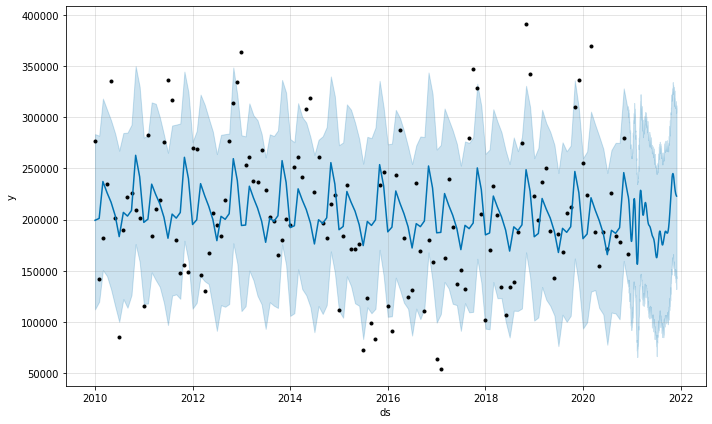

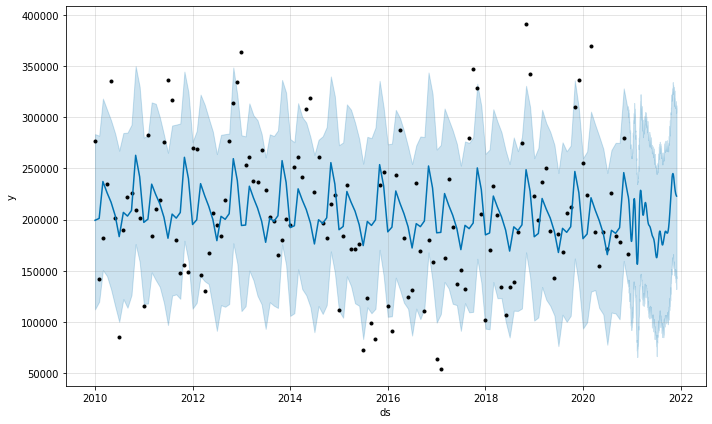

In [ ]:
# Plot Predictions
model.plot(prediction)

#### Narrative
+ A Trending data
+ Black dots : the actual data points in dataset.
+ Deep blue line : the predicted forecast/the predicted values
+ Light blue line : the boundaries

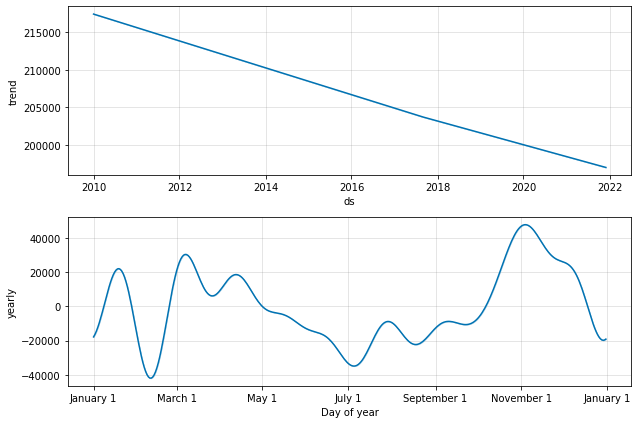

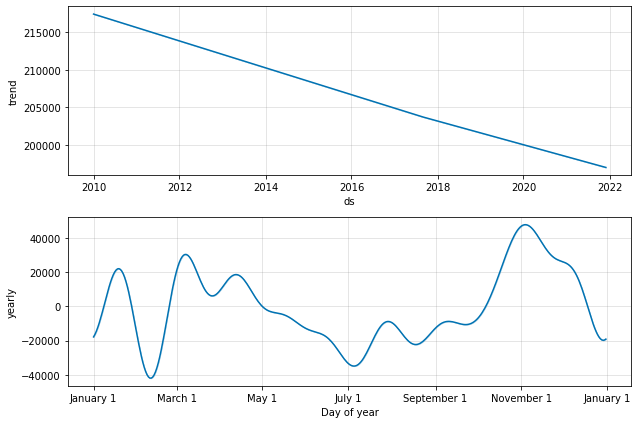

In [ ]:
# Visualize Each Component [Trends,Weekly]
model.plot_components(prediction)

### Cross Validation
+ For measuring forecast error by comparing the predicted values with the actual values
+ initial: the size of the initial training period
+ period: the spacing between cutoff dates
+ horizon: the forecast horizon(ds minus cutoff)
+  By default, the initial training period is set to three times the horizon, and cutoffs are made every half a horizon

In [ ]:
# Load Pkgs
from fbprophet.diagnostics import cross_validation

In [ ]:
df.shape

(131, 2)

In [ ]:
cv = cross_validation(model,initial='35 days', period='180 days', horizon = '365 days')

INFO:fbprophet:Making 20 forecasts with cutoffs between 2010-07-22 00:00:00 and 2019-12-02 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.
INFO:fbprophet:n_changepoints greater than number of observations. Using 13.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [ ]:
cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-08-01,8.303743e+03,8.303743e+03,8.303743e+03,104297.0,2010-07-22
1,2010-09-01,-9.796182e+05,-9.796182e+05,-9.796182e+05,32412.0,2010-07-22
2,2010-10-01,-9.656637e+05,-9.656637e+05,-9.656637e+05,4042.0,2010-07-22
3,2010-11-01,1.173449e+06,1.173449e+06,1.173449e+06,-16632.0,2010-07-22
4,2010-12-01,2.116278e+06,2.116278e+06,2.116278e+06,-7596.0,2010-07-22


#### Performance Metrics


In [ ]:
from fbprophet.diagnostics import performance_metrics

In [ ]:
df_pm = performance_metrics(cv)

In [ ]:
df_pm

,horizon,mse,rmse,mae,mape,mdape,coverage
0,41 days,5.572946e+10,236070.871748,129685.097440,15.205257,1.244497,0.458333
1,42 days,5.534227e+10,235249.373583,126700.860752,15.180516,1.263198,0.458333
2,46 days,5.541113e+10,235395.686146,125770.084569,15.314209,1.360210,0.500000
3,47 days,5.537231e+10,235313.214222,125403.207052,15.041661,1.360210,0.500000
4,48 days,7.140760e+10,267222.000359,143261.278575,15.209170,1.422300,0.500000
...,...,...,...,...,...,...,...
170,359 days,6.445902e+10,253887.803313,119251.934651,3.845848,1.076385,0.750000
171,360 days,6.459570e+10,254156.840877,120426.296943,3.836787,1.027374,0.750000
172,362 days,6.455580e+10,254078.343828,120165.159052,3.848002,1.155772,0.750000
173,364 days,6.520001e+10,255342.916822,125181.518884,3.885844,1.197371,0.708333


### Visualizing Performance Metrics
+ cutoff: how far into the future the prediction was

In [ ]:
from fbprophet.plot import plot_cross_validation_metric

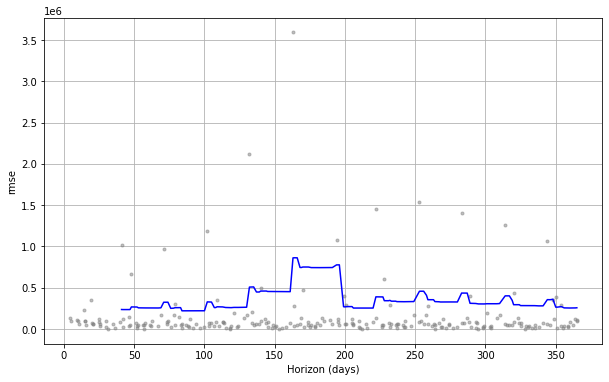

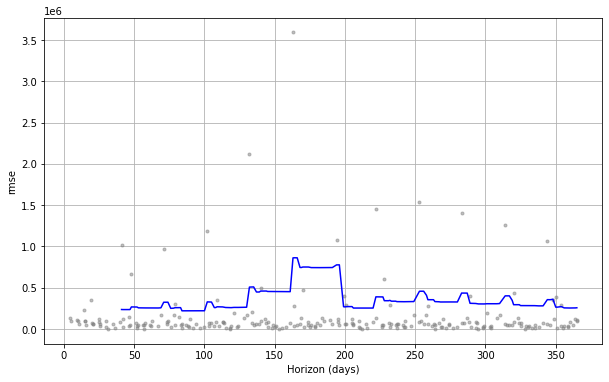

In [ ]:
plot_cross_validation_metric(cv,metric='rmse')

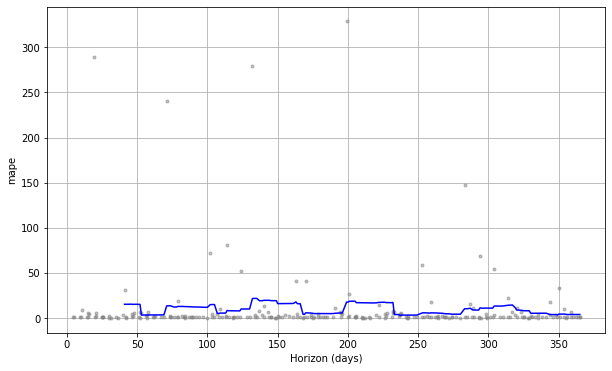

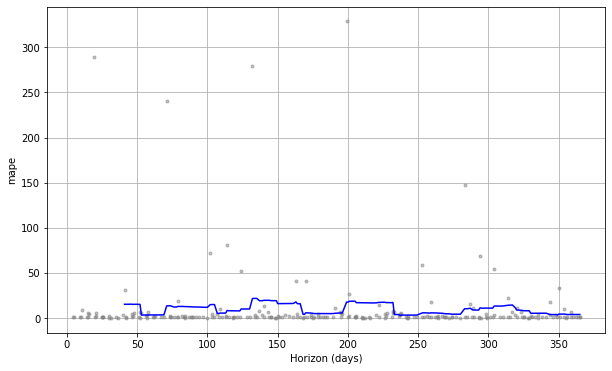

In [ ]:
plot_cross_validation_metric(cv,metric='mape')